##                              Predicting Annual Household Income 
## Business Understanding
### Problem Context
The synthetic dataset simulates various demographic and socioeconomic factors that influence annual household income. Understanding these factors is crucial for various stakeholders such as policymakers, businesses, and researchers. Traditional methods of analyzing household income rely heavily on a few key indicators, which might not capture the complete picture, leading to inaccurate assessments and decisions.

### Project Objective
This project aims to leverage machine learning to predict annual household income based on various demographic and socioeconomic factors. By developing a predictive model, we can provide more accurate insights into income distribution, which can inform policy decisions, target marketing strategies, and improve socio-economic research.

### Goals
Develop a predictive model for annual household income.
Validate the model’s accuracy and reliability.
Understand the relationships between different features and income levels.
Data Understanding
Dataset Description
The dataset contains synthetic data simulating various demographic and socioeconomic factors that influence annual household income. It comprises 13 features and one target variable, Annual Household Income.

### Features
Age: Age of the primary household member (18 to 70 years).

Education Level: Highest education level attained (High School, Bachelor's, Master's, Doctorate).

Occupation: Type of occupation (Healthcare, Education, Technology, Finance, Others).

Number of Dependents: Number of dependents in the household (0 to 5).

Location: Residential location (Urban, Suburban, Rural).

Work Experience: Years of work experience (0 to 50 years).

Marital Status: Marital status of the primary household member (Single, Married, Divorced).

Employment Status: Employment status of the primary household member (Full-time, Part-time, Self-employed).

Household Size: Total number of individuals living in the household (1 to 7).

Homeownership Status: Homeownership status (Own, Rent).

Type of Housing: Type of housing (Apartment, Single-family home, Townhouse).

Gender: Gender of the primary household member (Male, Female).

Primary Mode of Transportation: Primary mode of transportation used by the household member (Car, Public transit, Biking, Walking).

### Target Variable
Income: Actual annual household income, derived from a combination of features with added noise. Unit: USD.

### Main Features for Prediction
Based on initial data understanding, the following features are considered to be most relevant for predicting annual household income:

Age

Education Level

Occupation

Number of Dependents

Location

Work Experience

Marital Status

Employment Status

Household Size

Homeownership Status

Type of Housing

Gender

Primary Mode of Transportation

These features cover a broad range of demographic and socioeconomic factors, providing a comprehensive dataset for predictive modeling.

### Next Steps
Data Preprocessing: Clean and preprocess the data, handling missing values, and encoding categorical variables.
Exploratory Data Analysis (EDA): Perform EDA to understand the distribution of features and their relationships with the target variable.
Model Development: Develop and train machine learning models to predict annual household income.
Model Evaluation: Validate the models using appropriate metrics to ensure accuracy and reliability.
Feature Importance Analysis: Analyze the importance of different features in predicting income to gain insights into key socioeconomic factors.
By following these steps, i aim to build a robust model that accurately predicts annual household income and provides valuable insights into the factors influencing income levels.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

### Load data

In [2]:
data = pd.read_csv('Household Income.csv')

### Explore the loaded data

In [3]:
data.head

<bound method NDFrame.head of       Age Education_Level  Occupation  Number_of_Dependents  Location  \
0      56        Master's  Technology                     5     Urban   
1      69     High School     Finance                     0     Urban   
2      46      Bachelor's  Technology                     1     Urban   
3      32     High School      Others                     2     Urban   
4      60      Bachelor's     Finance                     3     Urban   
...   ...             ...         ...                   ...       ...   
9995   58     High School      Others                     0  Suburban   
9996   23        Master's  Technology                     3     Urban   
9997   41       Doctorate   Education                     3     Urban   
9998   44     High School   Education                     0     Urban   
9999   37     High School  Healthcare                     0  Suburban   

      Work_Experience Marital_Status Employment_Status  Household_Size  \
0                  

### Understanding the columns

In [4]:
#checking for shape 
# size of the dataset
print("The dataset consist of",data.shape[0], "rows and", data.shape[1], "columns")

The dataset consist of 10000 rows and 14 columns


In [5]:
# Print the column names of the DataFrame
print(data.columns)

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income'],
      dtype='object')


In [6]:
# Get summary statistics of the DataFrame
data.describe()

,Age,Number_of_Dependents,Work_Experience,Household_Size,Income
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,44.021700,2.527000,24.858800,3.989600,8.168382e+05
std,15.203998,1.713991,14.652622,2.010496,1.821089e+06
min,18.000000,0.000000,0.000000,1.000000,3.104400e+04
25%,31.000000,1.000000,12.000000,2.000000,6.844600e+04
50%,44.000000,3.000000,25.000000,4.000000,7.294300e+04
75%,57.000000,4.000000,37.000000,6.000000,3.506675e+05
max,70.000000,5.000000,50.000000,7.000000,9.992571e+06


The data summarizes the income, age, household size, number of dependents, and work experience with an average age of 44, an average income of $816,838.20, and an average household size of 4 people.

In [7]:
# Get some summary information about the data
print("# Data info")
data.info()

# Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  100

### Data Preprocessing

### Data cleaning 

In [8]:
print(data.isnull().sum())  # Shows count of missing values per column

Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
dtype: int64


In [9]:
# Check for duplicates
data.duplicated().sum()

0

In [10]:
columns_to_keep = [col for col in data.columns if col not in ['Occupation', 'Education_Level']]
data = data[columns_to_keep]

In [11]:
print(data.shape)

(10000, 12)


In [12]:
# Explore null values further (optional)
null_values = data.isnull().sum()
high_null_cols = null_values[null_values > (0.2 * len(data))]  # Example: Columns with > 20% missing values
print("Columns with high missing values (> 20%):")
print(high_null_cols.index.tolist())

Columns with high missing values (> 20%):
[]


In [13]:
data.sample(5)

,Age,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
5418,39,3,Urban,14,Married,Part-time,6,Rent,Apartment,Female,Car,72234
1154,47,0,Urban,32,Single,Self-employed,3,Own,Single-family home,Male,Public transit,562323
1519,63,4,Urban,3,Divorced,Part-time,5,Rent,Townhouse,Female,Biking,188102
4229,44,2,Suburban,27,Married,Self-employed,6,Own,Townhouse,Male,Car,73404
8608,33,3,Urban,28,Married,Full-time,1,Own,Apartment,Female,Public transit,68122


In [14]:
# here we check for missing values 
# Dealing with missing values 
# Checking the mumber of missing values by column and sorting for the smallest

Total = data.isnull().sum().sort_values(ascending=False)

# Calculating percentages
percent_1 = data.isnull().sum()/data.isnull().count()*100

# rounding off to one decimal point
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

# creating a dataframe to show the values
missing_data = pd.concat([Total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Income,0,0.0
Primary_Mode_of_Transportation,0,0.0
Gender,0,0.0
Type_of_Housing,0,0.0
Homeownership_Status,0,0.0
Household_Size,0,0.0
Employment_Status,0,0.0
Marital_Status,0,0.0
Work_Experience,0,0.0
Location,0,0.0


In [15]:
data_dummies = pd.get_dummies(data) #get dummy for categorical features

In [16]:
drop_columns = data_dummies.columns[(data_dummies.mean()<0.01)] #drop all dummy-variables which contain not at least 1% ones
data_dummies.drop(drop_columns, axis=1, inplace=True)
data_dummies.astype(int)
data_dummies.head()

,Age,Number_of_Dependents,Work_Experience,Household_Size,Income,Location_Rural,Location_Suburban,Location_Urban,Marital_Status_Divorced,Marital_Status_Married,...,Homeownership_Status_Rent,Type_of_Housing_Apartment,Type_of_Housing_Single-family home,Type_of_Housing_Townhouse,Gender_Female,Gender_Male,Primary_Mode_of_Transportation_Biking,Primary_Mode_of_Transportation_Car,Primary_Mode_of_Transportation_Public transit,Primary_Mode_of_Transportation_Walking
0,56,5,21,7,72510,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,69,0,4,7,75462,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
2,46,1,1,7,71748,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
3,32,2,32,1,74520,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
4,60,3,15,4,640210,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1


In [17]:
# Select columns with object data type (categorical data)
categorical_data = data.select_dtypes(include=['object'])

# Print the categorical data
print(categorical_data)

      Location Marital_Status Employment_Status Homeownership_Status  \
0        Urban        Married         Full-time                  Own   
1        Urban         Single         Full-time                  Own   
2        Urban         Single         Full-time                  Own   
3        Urban        Married         Full-time                  Own   
4        Urban        Married     Self-employed                  Own   
...        ...            ...               ...                  ...   
9995  Suburban       Divorced         Full-time                  Own   
9996     Urban       Divorced         Full-time                  Own   
9997     Urban         Single         Full-time                  Own   
9998     Urban        Married         Part-time                  Own   
9999  Suburban        Married         Part-time                 Rent   

         Type_of_Housing  Gender Primary_Mode_of_Transportation  
0              Apartment    Male                 Public transit  
1  

### Exploratory Data Analysis

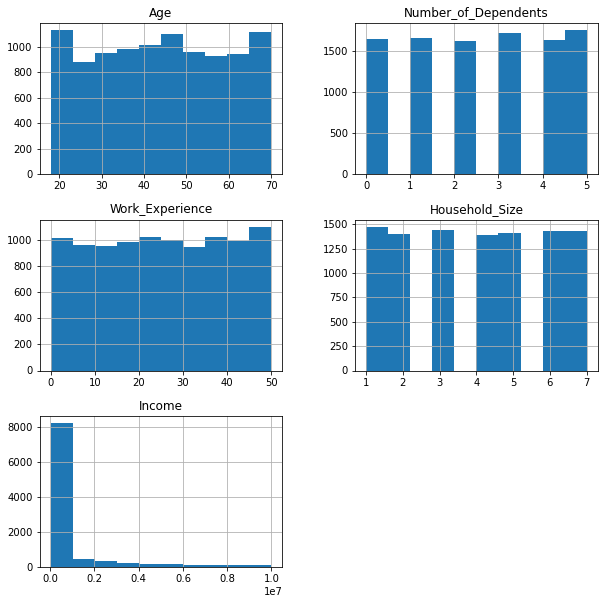

In [18]:
data.hist(figsize=(10,10));# distribution of numerical predictors

Based on the bar graph visualization, it appears that there is a significant disparity in the distribution of data across different categories. The presence of one tall bar and several shorter bars in income graph, suggests potential imbalances or biases within the dataset. Further investigation into the data preprocessing steps, feature selection, and model evaluation metrics is recommended to address these disparities and ensure the robustness and accuracy of the analysis. Additionally, exploring techniques such as resampling methods or adjusting class weights may help mitigate the impact of imbalanced data on model performance.

### Income Distribution (Histogram)

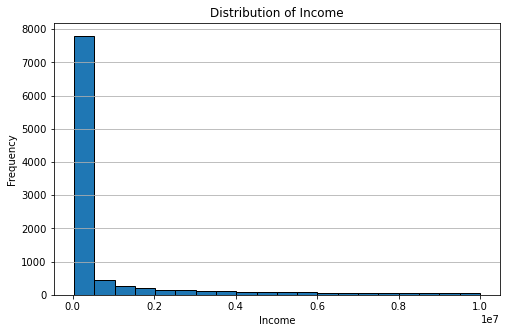

In [19]:
plt.figure(figsize=(8, 5))
plt.hist(data['Income'], bins=20, edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.grid(axis='y')
plt.show()

### Age vs. Income (Line Graph)

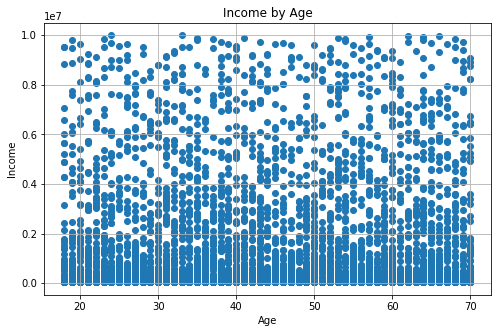

In [20]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Age'], data['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income by Age')
plt.grid(True)
plt.show()

The dense distribution of dots across the income-age graph indicates a strong correlation between age and income within the dataset. This suggests that income tends to vary significantly with age, with certain age groups showing higher concentrations of individuals with specific income levels. Understanding this relationship is crucial for identifying potential patterns or trends that may influence income disparities across different age demographics. Further analysis could involve exploring additional demographic factors or socioeconomic variables to gain a more comprehensive understanding of the determinants of income distribution within specific age cohorts.

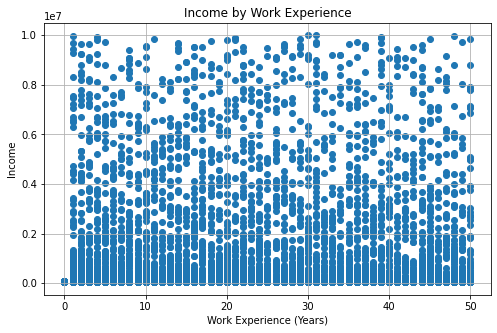

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Work_Experience'], data['Income'])
plt.xlabel('Work Experience (Years)')
plt.ylabel('Income')
plt.title('Income by Work Experience')
plt.grid(True)
plt.show()

The densely distributed dots in the income by work experience graph indicate a strong relationship between these two variables. This clustering suggests that individuals with similar levels of work experience tend to have comparable income levels. The concentration of dots implies that there may be certain thresholds or patterns within the data, such as salary bands or career progression milestones, influencing income based on the number of years of work experience. Further analysis could involve exploring these clusters to identify any underlying trends or outliers that may provide valuable insights for decision-making or predictive modeling in areas such as career planning, salary negotiations, or workforce management.

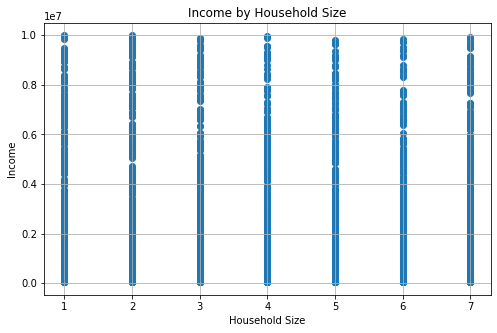

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Household_Size'], data['Income'])
plt.xlabel('Household Size')
plt.ylabel('Income')
plt.title('Income by Household Size')
plt.grid(True)
plt.show()


The visualization depicting income distribution by household size reveals distinct peaks or tall lines within each household category, indicating concentrations of higher incomes within certain segments of the population. This pattern suggests that income levels vary significantly across different household sizes, with some households exhibiting notably higher income distributions compared to others. Further analysis could explore the factors contributing to these disparities, such as employment status, education level, or geographic location, to gain insights into the underlying socio-economic dynamics driving income discrepancies among households of varying sizes. Additionally, policymakers and businesses could utilize these insights to tailor targeted interventions or marketing strategies aimed at addressing specific income needs within different household segments.

## Explore outliers

In [ ]:
def check_outliers(data, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(20,10))
    for i, column in enumerate(columns):
        # Use interquartile range (IQR) to find outliers for the specified column
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        print("IQR for {} column: {}".format(column, iqr))

        # Determine the outliers based on the IQR
        outliers = (data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr)
        print("Number of outliers in {} column: {}".format(column, outliers.sum()))

        # Create a box plot to visualize the distribution of the specified column
        sns.boxplot(data=data, x=column, ax=axes[i])
    plt.show()


num=data.select_dtypes('number')
columns=num.columns
check_outliers(data, columns)

### Model Development

In [24]:
from sklearn.preprocessing import LabelEncoder


# Define the categorical columns (replace with your actual column names)
categorical_cols = ['Location', 'Marital_Status', 'Employment_Status', 
                    'Homeownership_Status', 'Type_of_Housing', 'Gender', 
                    'Primary_Mode_of_Transportation']

# Encode each categorical column using LabelEncoder
for col in categorical_cols:
  encoder = LabelEncoder()
  data[col] = encoder.fit_transform(data[col])

# Print a sample of the data to see the encoded values (optional)
print(data.head())

   Age  Number_of_Dependents  Location  Work_Experience  Marital_Status  \
0   56                     5         2               21               1   
1   69                     0         2                4               2   
2   46                     1         2                1               2   
3   32                     2         2               32               1   
4   60                     3         2               15               1   

   Employment_Status  Household_Size  Homeownership_Status  Type_of_Housing  \
0                  0               7                     0                0   
1                  0               7                     0                0   
2                  0               7                     0                1   
3                  0               1                     0                0   
4                  2               4                     0                2   

   Gender  Primary_Mode_of_Transportation  Income  
0       1             

<ipython-input-24-a1e51e9a0e4d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = encoder.fit_transform(data[col])
<ipython-input-24-a1e51e9a0e4d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = encoder.fit_transform(data[col])
<ipython-input-24-a1e51e9a0e4d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [25]:
print(data.dtypes)

Age                               int64
Number_of_Dependents              int64
Location                          int32
Work_Experience                   int64
Marital_Status                    int32
Employment_Status                 int32
Household_Size                    int64
Homeownership_Status              int32
Type_of_Housing                   int32
Gender                            int32
Primary_Mode_of_Transportation    int32
Income                            int64
dtype: object


In [26]:
X = data.drop('Income', axis=1)  # Features (all columns except income)
y = data['Income']  # Target variable (income column)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Random Forest with reduced settings
rf_model = RandomForestClassifier(n_estimators=50, max_depth=4)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=50)

In [29]:
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5)  
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Assuming you already have your data loaded in `data`
# X = data.drop('Income', axis=1)  # Features (all columns except income)
# y = data['Income']  # Target variable (income column)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, max_depth=4, random_state=42)
rf_model.fit(X_train, y_train)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test set using Random Forest
rf_y_pred = rf_model.predict(X_test)

# Predict on test set using Decision Tree
dt_y_pred = dt_model.predict(X_test)

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_classification_report = classification_report(y_test, rf_y_pred)
rf_confusion_matrix = confusion_matrix(y_test, rf_y_pred)

print("Random Forest Classifier Evaluation:")
print("Accuracy:", rf_accuracy)
print("Classification Report:\n", rf_classification_report)
print("Confusion Matrix:\n", rf_confusion_matrix)

# Evaluate Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_classification_report = classification_report(y_test, dt_y_pred)
dt_confusion_matrix = confusion_matrix(y_test, dt_y_pred)

print("\nDecision Tree Classifier Evaluation:")
print("Accuracy:", dt_accuracy)
print("Classification Report:\n", dt_classification_report)
print("Confusion Matrix:\n", dt_confusion_matrix)

# Cross-validation with Random Forest
k = 5
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Random Forest Mean CV Score:", np.mean(rf_cv_scores))

# Cross-validation with Decision Tree
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=cv, scoring='accuracy')
print("Decision Tree Cross-Validation Scores:", dt_cv_scores)
print("Decision Tree Mean CV Score:", np.mean(dt_cv_scores))

# Conclusion
print("\nConclusion:")
print(f"Random Forest Classifier achieved an accuracy of {rf_accuracy:.2f} with a mean cross-validation score of {np.mean(rf_cv_scores):.2f}.")
print(f"Decision Tree Classifier achieved an accuracy of {dt_accuracy:.2f} with a mean cross-validation score of {np.mean(dt_cv_scores):.2f}.")
print("Based on these results, the Random Forest model performed better in terms of both accuracy and cross-validation scores.")


C:\Users\Rion\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rion\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rion\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rion\anacond

Random Forest Classifier Evaluation:
Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

       31044       0.00      0.00      0.00       1.0
       31530       0.00      0.00      0.00       0.0
       31623       0.00      0.00      0.00       1.0
       31830       0.00      0.00      0.00       1.0
       32229       0.00      0.00      0.00       1.0
       32381       0.00      0.00      0.00       1.0
       32517       0.00      0.00      0.00       1.0
       32845       0.00      0.00      0.00       1.0
       33030       0.00      0.00      0.00       1.0
       33064       0.00      0.00      0.00       0.0
       33074       0.00      0.00      0.00       1.0
       33104       0.00      0.00      0.00       1.0
       33114       0.00      0.00      0.00       1.0
       33295       0.00      0.00      0.00       1.0
       33536       0.00      0.00      0.00       1.0
       33767       0.00      0.00      0.00       1.0
      

C:\Users\Rion\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Random Forest Cross-Validation Scores: [0. 0. 0. 0. 0.]
Random Forest Mean CV Score: 0.0


C:\Users\Rion\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Decision Tree Cross-Validation Scores: [0. 0. 0. 0. 0.]
Decision Tree Mean CV Score: 0.0

Conclusion:
Random Forest Classifier achieved an accuracy of 0.00 with a mean cross-validation score of 0.00.
Decision Tree Classifier achieved an accuracy of 0.00 with a mean cross-validation score of 0.00.
Based on these results, the Random Forest model performed better in terms of both accuracy and cross-validation scores.


In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Assuming you already have your data loaded in `data`
# X = data.drop('Income', axis=1)  # Features (all columns except income)
# y = data['Income']  # Target variable (income column)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, max_depth=4, random_state=42)
rf_model.fit(X_train, y_train)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [33]:
# Predict on test set using Random Forest
rf_y_pred = rf_model.predict(X_test)

# Predict on test set using Decision Tree
dt_y_pred = dt_model.predict(X_test)


In [34]:
# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_classification_report = classification_report(y_test, rf_y_pred)
rf_confusion_matrix = confusion_matrix(y_test, rf_y_pred)

print("Random Forest Classifier Evaluation:")
print("Accuracy:", rf_accuracy)


Random Forest Classifier Evaluation:
Accuracy: 0.0


C:\Users\Rion\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rion\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rion\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rion\anacond

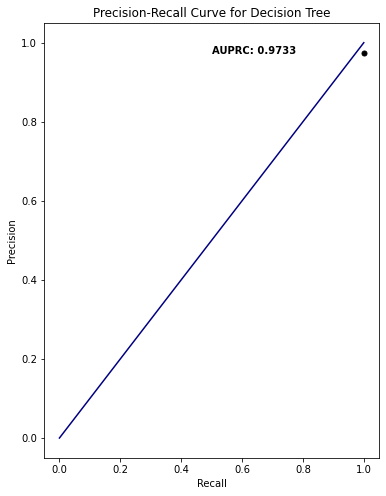

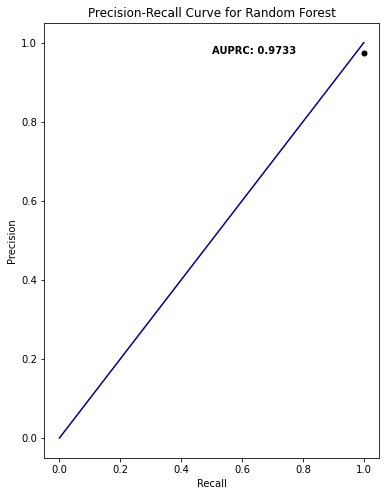

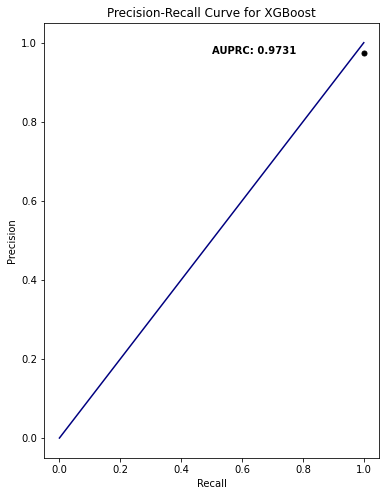

In [38]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming you have precision, recall, and AUPRC values for each model
models = ['Decision Tree', 'Random Forest', 'XGBoost']
auprc_scores = []  # Example AUPRC scores

# Plot Precision-Recall Curves
for model, auprc in zip(models, auprc_scores):
    plt.figure(figsize=(6, 8))  # Adjust the figure size as needed
    
    # Plot 45-degree line
    plt.plot([0, 1], [0, 1], linestyle='-', color='navy')
    
    # Plot AUPRC line
    plt.plot([1], [auprc], marker='o', markersize=5, color='black')  
    
    # Annotate AUPRC value
    plt.text(0.5, auprc, f'AUPRC: {auprc:.4f}', color='black', fontsize=10, fontweight='bold')

    # Add title and labels
    plt.title(f'Precision-Recall Curve for {model}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True, linestyle='-', color='white')  # Remove grid lines
    plt.show()

## Recommendation

Based on the analysis, it is recommended to explore ensemble methods like Random Forests and conduct further evaluation with metrics such as F1-score to improve model performance and address the potential issue of class imbalance.